In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

warnings.filterwarnings("ignore")

In [2]:

rawData = pd.read_csv("./winequality-red.csv")
rawData.shape

(1599, 12)

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
rawData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
rawData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


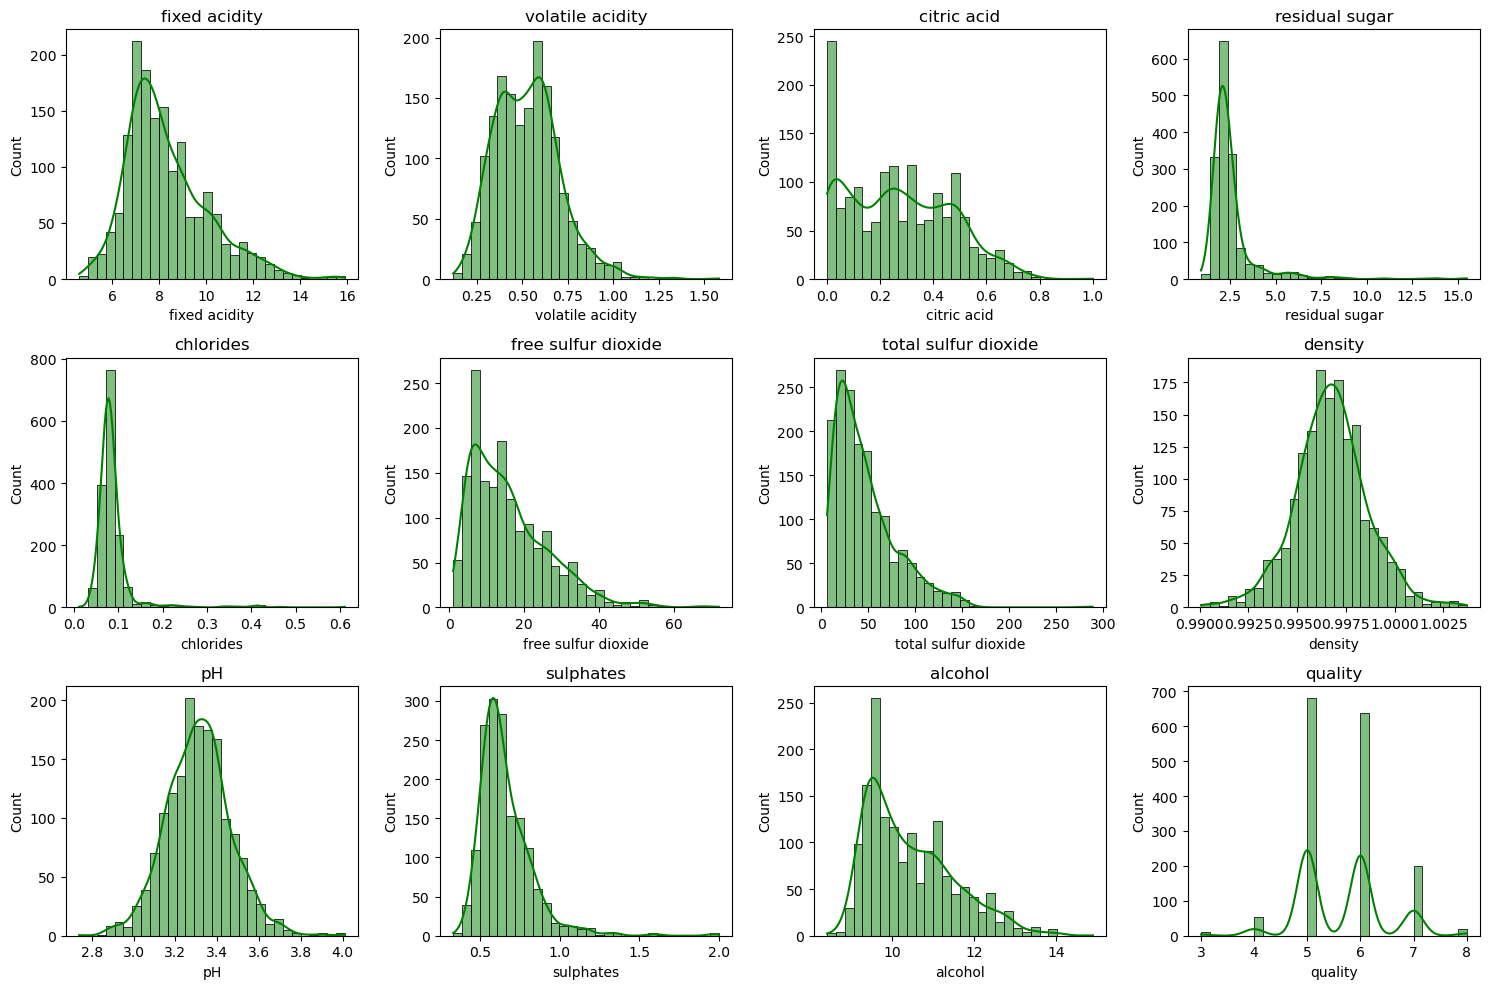

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(rawData.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=rawData, x=column, kde=True, bins=30, color='green')
    plt.title(column)
plt.tight_layout()
plt.show()

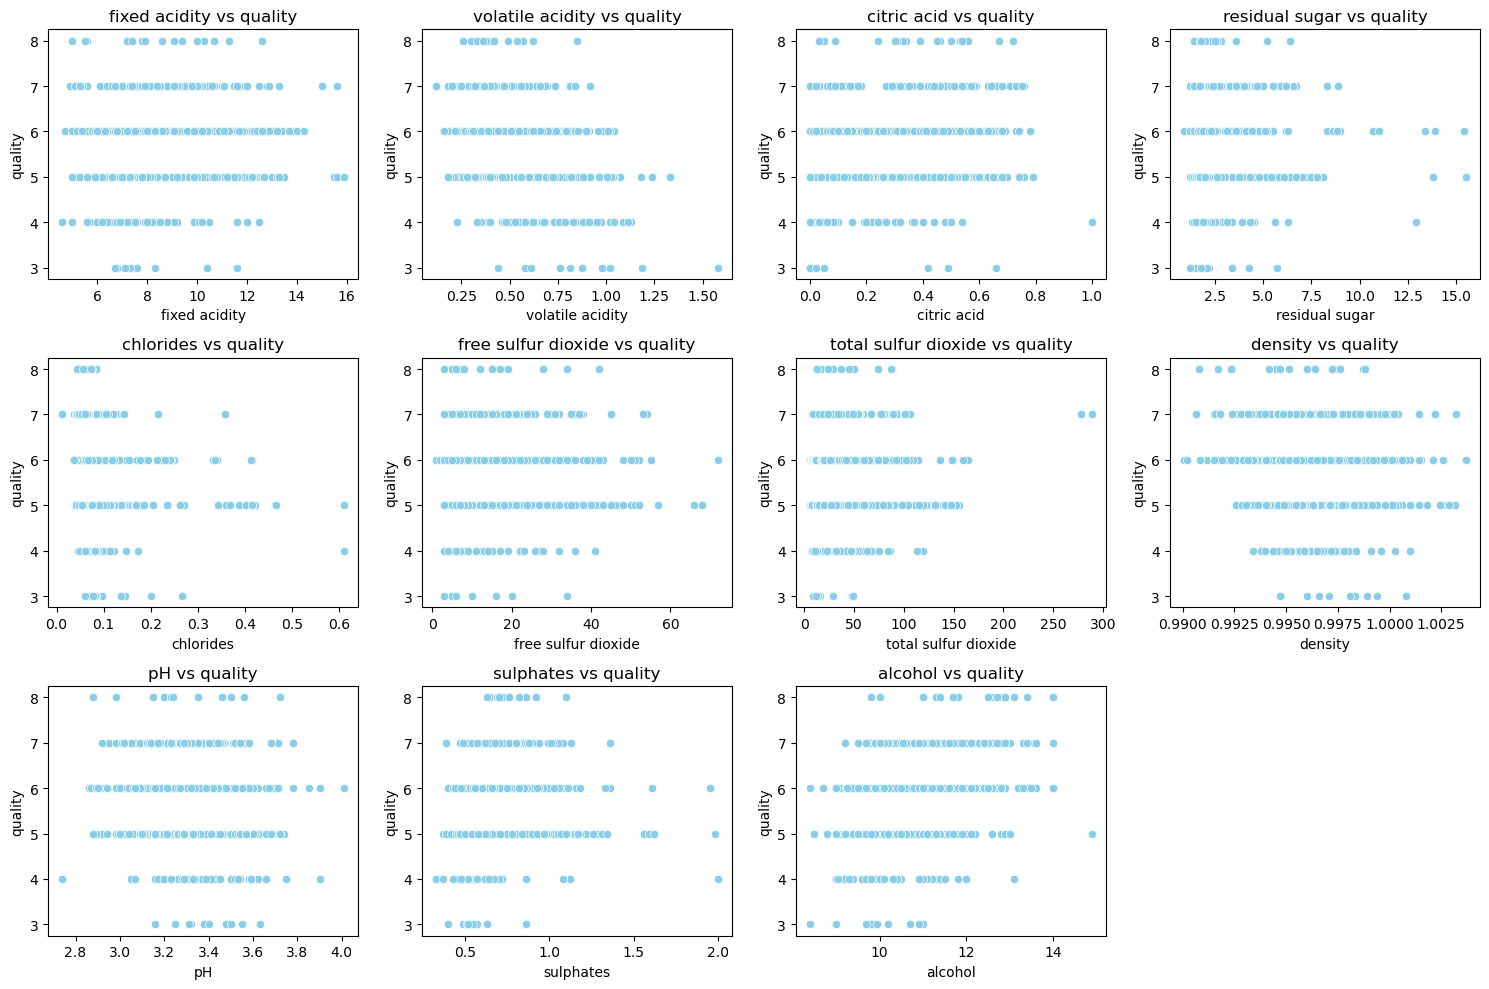

In [7]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(rawData.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(data=rawData, x=column, y='quality', color='skyblue')
    plt.title(f'{column} vs quality')
plt.tight_layout()
plt.show()

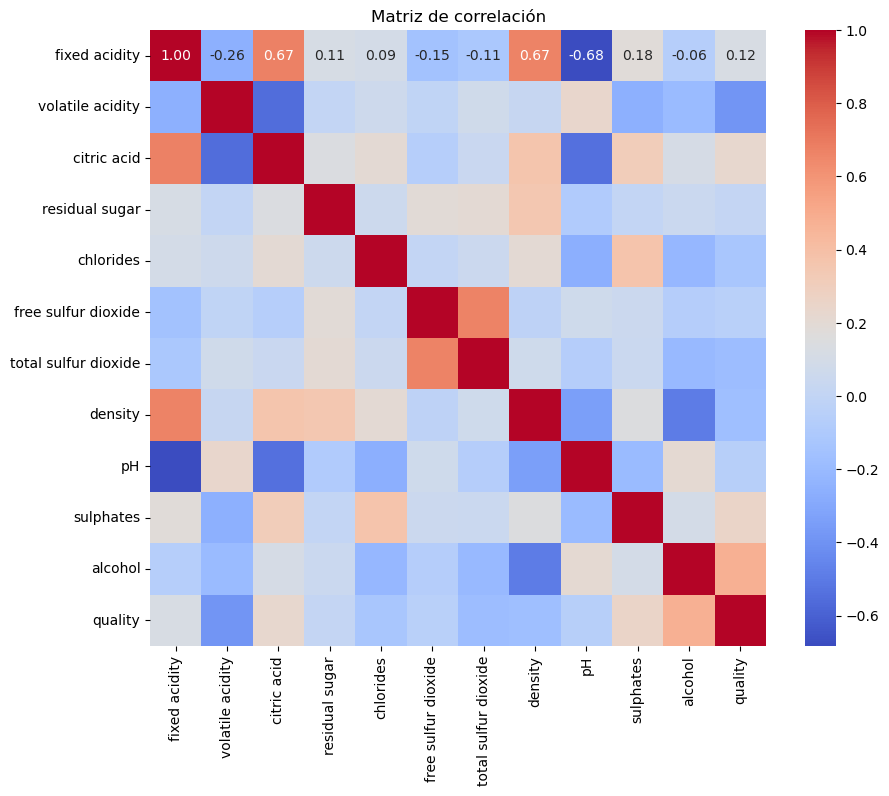

In [8]:
correlation_matrix = rawData.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación')
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [9]:
rawData.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
print("Número de filas duplicadas:", rawData.duplicated().sum())

Número de filas duplicadas: 240


In [11]:
wineData = rawData.drop_duplicates()

In [12]:
print("Número de filas duplicadas:", wineData.duplicated().sum())

Número de filas duplicadas: 0


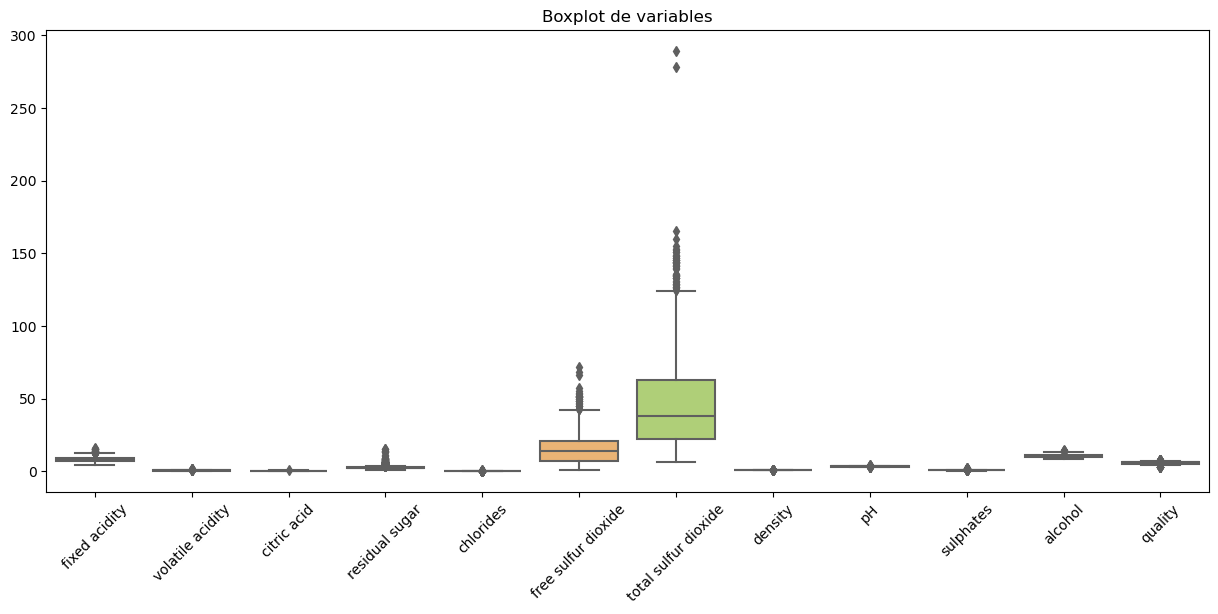

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=wineData, palette='Set3')
plt.title('Boxplot de variables')
plt.xticks(rotation=45)
plt.show()

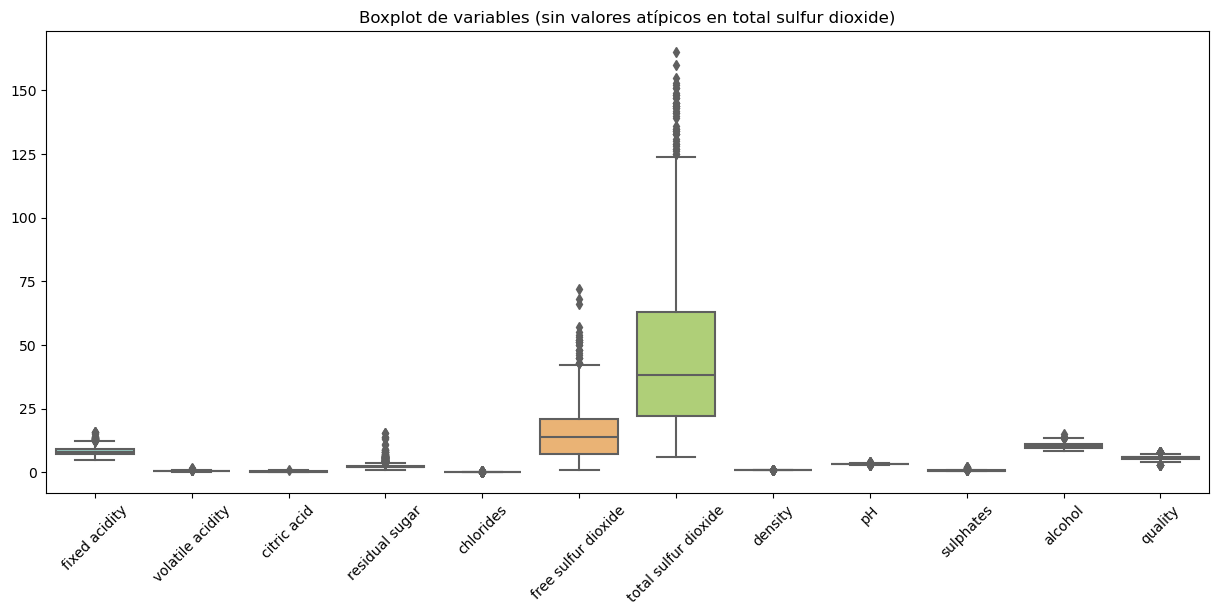

In [14]:
wineData = wineData[wineData["total sulfur dioxide"] <= 250]

# Visualizar boxplots actualizados
plt.figure(figsize=(15, 6))
sns.boxplot(data=wineData, palette='Set3')
plt.title('Boxplot de variables (sin valores atípicos en total sulfur dioxide)')
plt.xticks(rotation=45)
plt.show()

In [15]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1357 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1357 non-null   float64
 1   volatile acidity      1357 non-null   float64
 2   citric acid           1357 non-null   float64
 3   residual sugar        1357 non-null   float64
 4   chlorides             1357 non-null   float64
 5   free sulfur dioxide   1357 non-null   float64
 6   total sulfur dioxide  1357 non-null   float64
 7   density               1357 non-null   float64
 8   pH                    1357 non-null   float64
 9   sulphates             1357 non-null   float64
 10  alcohol               1357 non-null   float64
 11  quality               1357 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 137.8 KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

### Característica de Interés

- **quality**: Toma valores desde 0 hasta 10 y representa la calidad del vino, donde 0 es la peor calidad y 10 es la mejor calidad.
- Nuestro objetivo es predecir la calidad del vino tinto basándonos en las características fisicoquímicas determinadas por las demás columnas del conjunto de datos.
- Aunque en la matriz de correlación observamos que las variables con mayor correlación respecto a la calidad son el alcohol y la acidez volátil, no haremos uso de esta información en nuestro análisis.

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [16]:
X = wineData.drop("quality", axis=1)
y = wineData["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=4)

# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [17]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [18]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.11      0.13         9
           5       0.62      0.70      0.66       119
           6       0.51      0.42      0.46       109
           7       0.39      0.44      0.41        32
           8       0.00      0.00      0.00         1

    accuracy                           0.53       272
   macro avg       0.28      0.28      0.28       272
weighted avg       0.52      0.53      0.52       272



In [19]:
accuracy_value = metrics.accuracy_score(y_test,y_pred)
accuracy_value

0.5294117647058824

# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

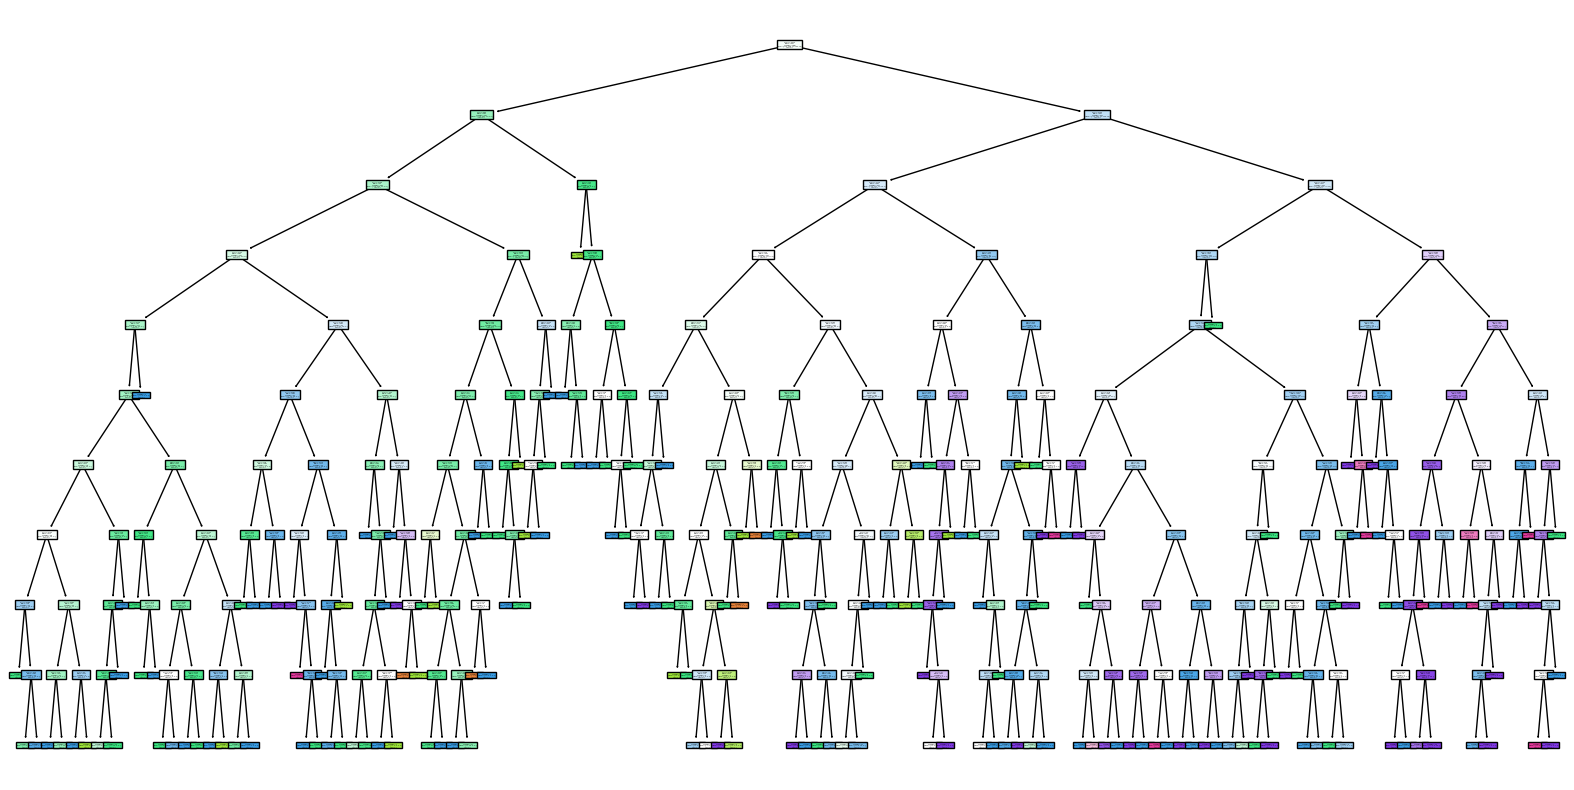

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(tree, class_names=np.unique(y).astype(str), filled=True)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

- **Precision:** Indica la proporción de instancias positivas clasificadas correctamente. Por ejemplo, para la clase 5, el modelo clasifica correctamente el 62% de las instancias etiquetadas como clase 5.

- **Recall:** Indica la proporción de instancias positivas que se clasificaron correctamente de todas las instancias que realmente pertenecen a esa clase. Por ejemplo, para la clase 6, el modelo clasifica correctamente el 42% de todas las instancias que realmente son de clase 6.

- **F1-score:** Es una medida que combina precision y recall en un solo valor. Es útil cuando tienes un desequilibrio entre las clases. Por ejemplo, para la clase 5, el valor F1-score es 0.66, lo que indica un equilibrio entre precision y recall.

- **Accuracy:** La precisión global del modelo es del 52.94%. Esto significa que el modelo clasifica correctamente aproximadamente el 52.94% de todas las muestras en el conjunto de pruebas.

**Interpretación:**

- El modelo tiene un rendimiento variable en la clasificación de las diferentes clases de vinos. Clasifica mejor las clases más representadas (5 y 6) en comparación con las clases menos representadas (3 y 8).
- El rendimiento general del modelo, aunque por encima del azar, podría no ser lo suficientemente alto como para ser útil en un escenario de producción.

**Curiosidad:**

- La precisión global (Accuracy) era más alta cuando no se eliminaban las filas duplicadas; arrojaba aproximadamente 0.6.
.
